In [2]:
# prepare observation data and relevant simulation results

# compare the simulations and observations
import os
import numpy        as np
import pandas       as pd
import multiprocess as mp       # from multiprocessing import Pool
import warnings
warnings.filterwarnings("ignore")

# basic settings

def run_one_plot(key_value):    # iobs, obsfile
    iobs, obsfile = key_value
    obsfilename   = obs_path+plot_name+"/observation_files/"+obsfile
    df_all = pd.read_csv(obsfilename)
    # df_all = df_all[df_all["year"]>=2015]
    df_all.rename(columns={'mean': 'obs'},     inplace=True)
    df_all.rename(columns={'std':  'obs_std'}, inplace=True)
    # dat_mod_var = np.full((61320, nsimu), np.nan)
    dat_mod_var = np.full((70080, nsimu), np.nan)
    for i in range(nsimu):
        if i<9:    ifile = "00"+str(i+1)
        elif i<99: ifile = "0"+str(i+1)
        else:      ifile = str(i+1)
        # mod_file = mod_path + case_name+plot_name+ "/results_csv_format/TECO-SPRUCE_"+case_name+plot_name+"_Hourly_"+ifile+".csv"
        mod_file = mod_path + "/TECO-SPRUCE_"+case_name+plot_name+"_Hourly_"+ifile+".csv"
        df_mod   = pd.read_csv(mod_file, index_col=None)
        df_mod.rename(columns={' year':"year"}, inplace=True)
        if iobs == "ANPP_shrub":
            dat_mod_var[:, i] = 0.25*(df_mod["nppLeaf_Shrub"] + df_mod["nppStem_Shrub"]).to_numpy().flatten()
        if iobs == "ANPP_tree":
            dat_mod_var[:, i] = 0.5*(df_mod["nppLeaf_Tree"] + df_mod["nppStem_Tree"]).to_numpy().flatten()
        if iobs == "NPP_sphag":
            dat_mod_var[:, i] = 0.25*df_mod["npp_Sphagnum"].to_numpy().flatten()
        if iobs == "BNPP": 
            dat_mod_var[:, i] = 0.25*(df_mod["nppRoot_Shrub"] + df_mod["nppRoot_Tree"]).to_numpy().flatten()
        if iobs == "ER_d":  
            dat_mod_var[:, i] = (0.25*df_mod["ra_Sphagnum"] + 0.25*df_mod["ra_Shrub"] + df_mod["rh"]).to_numpy().flatten()             
        if iobs == "GPP_d":
            dat_mod_var[:, i] = (0.25*df_mod["gpp_Shrub"] + 0.25*df_mod["gpp_Sphagnum"]).to_numpy().flatten()
        if iobs == "NEE_d":
            dat_mod_var[:, i] = ((0.25*df_mod["ra_Sphagnum"] + 0.25*df_mod["ra_Shrub"] + df_mod["rh"]) - (0.25*df_mod["gpp_Shrub"] + 0.25*df_mod["gpp_Sphagnum"])).to_numpy().flatten()
        if iobs == "LAI_d":
            dat_mod_var[:, i] = (0.25*df_mod["lai_Shrub"] + 0.5*df_mod["lai_Tree"]).to_numpy().flatten()
        if iobs == "cLeaf_shrub":
            dat_mod_var[:, i] = 0.25*df_mod["cLeaf_Shrub"].to_numpy().flatten()
        if iobs == "cStem_shrub":
            dat_mod_var[:, i] = 0.25*df_mod["cStem_Shrub"].to_numpy().flatten()
        if iobs == "cPlant_Tree":
            dat_mod_var[:,i] = 0.5*(df_mod["cLeaf_Tree"] + df_mod["cStem_Tree"]).to_numpy().flatten()
        if iobs == "cPlant_sphag":
            dat_mod_var[:,i] = 0.25*(df_mod["cLeaf_Sphagnum"] + df_mod["cStem_Sphagnum"] + df_mod["cRoot_Sphagnum"]).to_numpy().flatten()
        if iobs == "cSoil":
            dat_mod_var[:,i] = df_mod['cSoil'].to_numpy().flatten()
        if iobs == "raLeaf_shrub":
            dat_mod_var[:, i] = df_mod["raLeaf_Shrub"].to_numpy().flatten()
        if iobs == "raLeaf_Tree":
            dat_mod_var[:, i] = df_mod["raLeaf_Tree"].to_numpy().flatten()
        if iobs == "CH4_d": 
            # dat_mod_var[:, i] = df_mod[["CH4_2", "CH4_3", "CH4_4", "CH4_5", "CH4_6", "CH4_7", "CH4_8", "CH4_9", "CH4_10"]].sum(axis=1).to_numpy().flatten()   
            dat_mod_var[:, i] = df_mod["wetlandCH4"].to_numpy().flatten()   
        if iobs == "CN_shrub":
            dat_mod_var[:, i] = ((df_mod["cLeaf_Sphagnum"] + df_mod["cStem_Sphagnum"] + df_mod["cRoot_Sphagnum"])/(df_mod["nLeaf_Sphagnum"] + df_mod["nStem_Sphagnum"] + df_mod["nRoot_Sphagnum"])).to_numpy().flatten()   
        if iobs == "GPP_shrub":
            dat_mod_var[:, i] = df_mod["gpp_Shrub"].to_numpy().flatten()
        if iobs == "GPP_Tree":
            dat_mod_var[:, i] = df_mod["gpp_Tree"].to_numpy().flatten()
        if iobs == "CH4_y":   
            dat_mod_var[:, i] = df_mod["wetlandCH4"].to_numpy().flatten()  
        if iobs == "rh_y":   
            dat_mod_var[:, i] = df_mod["rh"].to_numpy().flatten() 
        if iobs == "bnpp_tree_y":
            dat_mod_var[:, i] = 0.5*df_mod["nppRoot_Tree"].to_numpy().flatten() 
        if iobs == "bnpp_shrub_y":
            dat_mod_var[:, i] = 0.25*df_mod["nppRoot_Shrub"].to_numpy().flatten() 
        if iobs == "gpp_tree_y":
            dat_mod_var[:, i] = 0.5*df_mod["gpp_Tree"].to_numpy().flatten() 
        if iobs == "lai_shrub":
            dat_mod_var[:, i] = df_mod["lai_Shrub"].to_numpy().flatten()
        if iobs == "lai_tree":
            dat_mod_var[:, i] = df_mod["lai_Tree"].to_numpy().flatten()
        if iobs == "photo_tree_h":
            dat_mod_var[:, i] = df_mod["Aleaf_sum_Tree"].to_numpy().flatten()

        if i == nsimu-1:
            df_mod_var = pd.DataFrame()
            df_mod_var = df_mod[["year", "doy", "hour"]].reset_index()
            df_mod_var = pd.concat([df_mod_var, pd.DataFrame(dat_mod_var)], axis=1)
            # print(df_mod_var)
            if iobs == "ANPP_shrub":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_1_compare_"+iobs+".xlsx")
            if iobs == "ANPP_tree":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_2_compare_"+iobs+".xlsx")
            if iobs == "NPP_sphag":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_3_compare_"+iobs+".xlsx")
            if iobs == "BNPP": 
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_4_compare_"+iobs+".xlsx")
            if iobs == "ER_d":# test hourly
                # df_mod_var["hour"] = 24
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')  
                result_df.to_excel(save_path+plot_name+"_5_compare_"+iobs+".xlsx")           
            if iobs == "GPP_d":# test hourly
                # print(df_mod_var)
                # df_mod_var["hour"] = 24
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left') 
                # print("dat_mod:", dat_mod)
                # print("result_df:", result_df) 
                result_df.to_excel(save_path+plot_name+"_6_compare_"+iobs+".xlsx")             
            if iobs == "NEE_d":#teset hourly
                # df_mod_var["hour"] = 24
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')  
                result_df.to_excel(save_path+plot_name+"_7_compare_"+iobs+".xlsx") 
            
            if iobs == "cLeaf_shrub":
                # df_mod_var = df_mod_var.groupby('year', as_index=False).mean()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                # dat_mod["doy"] = 365
                dat_mod["hour"] = dat_mod["hour"]+1#23
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_8_compare_"+iobs+".xlsx")
            if iobs == "cStem_shrub":
                # df_mod_var = df_mod_var.groupby('year', as_index=False).mean()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                # dat_mod["doy"] = 365
                dat_mod["hour"] = dat_mod["hour"]+1#23
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_9_compare_"+iobs+".xlsx")
            if iobs == "cPlant_Tree":
                # print("test cPlant_Tree dat_all: ",df_all)
                # df_mod_var = df_mod_var.groupby('year', as_index=False).mean()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                # dat_mod["doy"] = 365
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                # print("test cPlant_Tree: ",dat_mod)
                # print("test cPlant_Tree result_df: ",result_df)  
                result_df.to_excel(save_path+plot_name+"_10_compare_"+iobs+".xlsx")
            if iobs == "cPlant_sphag":
                # print("test cPlant_Tree dat_all: ",df_all)
                # df_mod_var = df_mod_var.groupby('year', as_index=False).mean()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                # dat_mod["doy"] = 365
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                # print("test cPlant_Tree: ",dat_mod)
                # print("test cPlant_Tree result_df: ",result_df)
                result_df.to_excel(save_path+plot_name+"_11_compare_"+iobs+".xlsx")

            if iobs == "cSoil":
                # df_mod_var = df_mod_var.groupby('year', as_index=False).mean()
                # df_mod_var = df_mod_var
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                # dat_mod["doy"] = 365
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_12_compare_"+iobs+".xlsx")
            if iobs == "CH4_d":
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')  
                result_df.to_excel(save_path+plot_name+"_13_compare_"+iobs+".xlsx")
            if iobs == "CH4_y":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_14_compare_"+iobs+".xlsx")
            if iobs == "rh_y":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_15_compare_"+iobs+".xlsx")

            if iobs == "bnpp_tree_y":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_16_compare_"+iobs+".xlsx")

            if iobs == "bnpp_shrub_y":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_17_compare_"+iobs+".xlsx")

            if iobs == "gpp_tree_y":
                df_mod_var = df_mod_var.groupby('year', as_index=False).sum()
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["doy"] = 365
                dat_mod["hour"] = 24
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_18_compare_"+iobs+".xlsx")


            if iobs == "lai_shrub": 
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                # dat_mod["doy"] = 365
                dat_mod["hour"] = dat_mod["hour"]+1#23
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_19_compare_"+iobs+".xlsx")

            if iobs == "lai_tree": 
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left') 
                result_df.to_excel(save_path+plot_name+"_20_compare_"+iobs+".xlsx")

            if iobs == "photo_tree_h":
                dat_mod    = df_mod_var[["year", "doy", "hour"]]
                dat_mod["mod"] = df_mod_var.iloc[:,4:].mean(axis=1)#*24
                dat_mod["mod_std"] = df_mod_var.iloc[:,4:].std(axis=1)
                dat_mod["hour"] = dat_mod["hour"] + 1
                result_df = pd.merge(df_all, dat_mod, on=['year', 'doy', 'hour'], how='left')
                result_df.to_excel(save_path+plot_name+"_21_compare_"+iobs+".xlsx")


def run_plot(plot_name):
    with mp.Pool(18) as pool:
        result = pool.map(run_one_plot, file_names.items())

if __name__ == "__main__":
    # common settings
    nsimu    = 1
    # mod_path = "outputs/"
    mod_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/figshare/2_estimations/treatments/DA_MCMC_1/estimates/"
    # obs_path = "inputs/in_treat/"
    obs_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/figshare/1_datasets_from_SPRUCE/in_treat_2014-2021/"

    file_names = {"ANPP_shrub"   : "obsfile_anpp_shrub_y.txt",        
                  "ANPP_tree"    : "obsfile_anpp_tree_y.txt",
                  "NPP_sphag"    : "obsfile_npp_shag_y.txt", 
                  "BNPP"         : "obsfile_bnpp_y.txt",   
                  "ER_d"         : "obsfile_er_h.txt",                
                  "GPP_d"        : "obsfile_gpp_h.txt",             
                  "NEE_d"        : "obsfile_nee_h.txt",                             
                  "cLeaf_shrub"  : "obsfile_leaf_mass_shrub_y.txt", 
                  "cStem_shrub"  : "obsfile_stem_mass_shrub_y.txt",
                  "cPlant_Tree"  : "obsfile_Tree_PlantC_y.txt",      
                  "cPlant_sphag" : "obsfile_cPlant_sphag_y.txt",
                  "cSoil"        : "obsfile_soil_C_y.txt",
                  "CH4_d"        : "obsfile_ch4_h.txt", 
                  "CH4_y"        : "obsfile_ch4_y.txt",
                  "rh_y"         : "obsfile_rh_y.txt",
                  "lai_shrub"    : "obsfile_LAI_shrub_d.txt", 
                  "lai_tree"     : "obsfile_LAI_tree_d.txt",
                  "photo_tree_h" : "obsfile_photo_tree_h.txt"}
    
    plot_names = ["P04", "P06",  "P08", "P10", "P11", "P13", "P16", "P17", "P19", "P20"]
    for iplot, plot_name in enumerate(plot_names):
        print(plot_name)
        case_name = "run_mcmc_"
        # save_path = "results/test_4/"+case_name +plot_name+"/" 
        save_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/1_simu_obs/"+case_name +plot_name+"/" 
        if not os.path.exists(save_path): os.makedirs(save_path)
        run_plot(plot_name)

P04
P06
P08
P10
P11
P13
P16
P17
P19
P20


0
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
1
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
2
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
3
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
4
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
5
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
6
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
7
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
8
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
9
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
10
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
11
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
12
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
13
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
14
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
15
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
16
P04
P06
P08
P10
P11
P13
P16
P17
P19
P20
[<matplotlib.collections.PathCollection object at 0x3383f1f10>, <matplotlib.collections.PathCollection object at 0x337c1b680>, <matplotlib.collections.PathCollection object at 0x33866f7a0>, <matplotlib.collections.PathCollection object at 0x336226900>, <matplotlib.collections.Pa

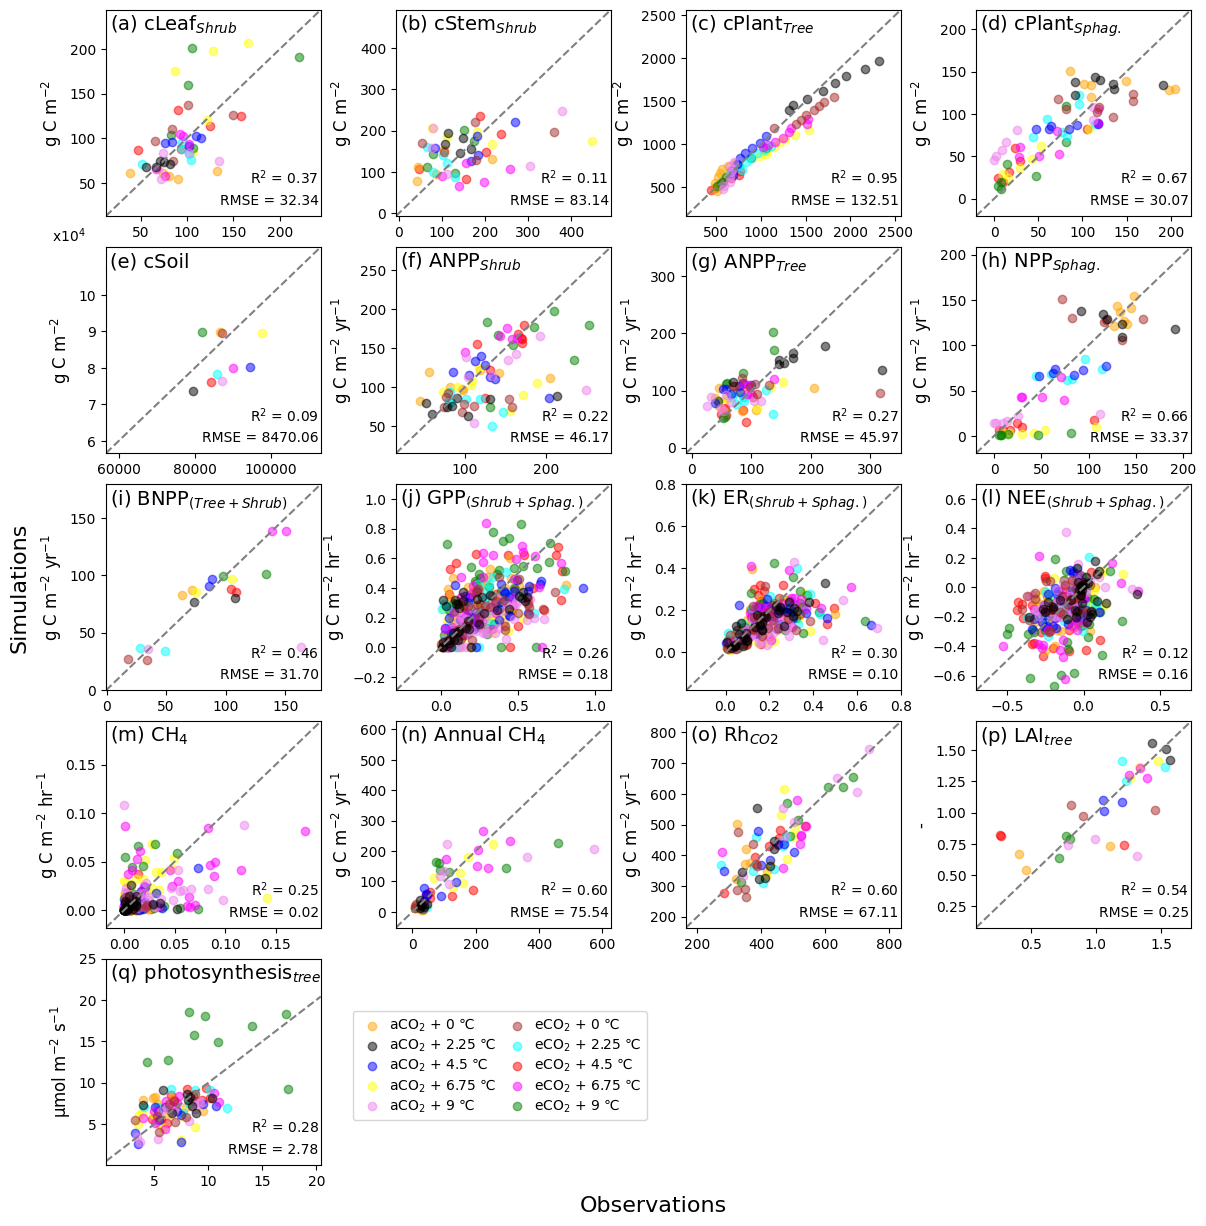

In [4]:
# used to plot the obs. vs. simu.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from math import sqrt


file_path  = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/1_simu_obs/run_mcmc_"

dict_plots = {"P04": "results/run_mcmc_P04", "P06": "results/run_mcmc_P06", 
              "P08": "results/run_mcmc_P08", "P10": "results/run_mcmc_P10", 
              "P11": "results/run_mcmc_P11", "P13": "results/run_mcmc_P13", 
              "P16": "results/run_mcmc_P16", "P17": "results/run_mcmc_P17", 
              "P19": "results/run_mcmc_P19", "P20": "results/run_mcmc_P20"}

file_names = {"cLeaf_Shrub"     : "_8_compare_cLeaf_shrub.xlsx", 
              "cStem_Shrub"     : "_9_compare_cStem_shrub.xlsx",
              "cPlant_Tree"     : "_10_compare_cPlant_Tree.xlsx", 
              "cPlant_Sphagnum" : "_11_compare_cPlant_sphag.xlsx",
              "cSoil"           : "_12_compare_cSoil.xlsx",
              "ANPP_Shrub"      : "_1_compare_ANPP_shrub.xlsx", 
              "ANPP_Tree"       : "_2_compare_ANPP_tree.xlsx", 
              "NPP_Sphagnum"    : "_3_compare_NPP_sphag.xlsx", 
              "BNPP"            : "_4_compare_BNPP.xlsx",
              "GPP"             : "_6_compare_GPP_d.xlsx", 
              "ER"              : "_5_compare_ER_d.xlsx", 
              "NEE"             : "_7_compare_NEE_d.xlsx",
              "CH4"             : "_13_compare_CH4_d.xlsx", 
              "CH4_y"           : "_14_compare_CH4_y.xlsx", 
              "Rh"              : "_15_compare_rh_y.xlsx",
              "lai_tree"        : "_20_compare_lai_tree.xlsx",
              "photo_tree_h"    : "_21_compare_photo_tree_h.xlsx"
            }

title_names = [ "(a) cLeaf$_{Shrub}$", 
                "(b) cStem$_{Shrub}$", 
                "(c) cPlant$_{Tree}$", 
                "(d) cPlant$_{Sphag.}$", 
                "(e) cSoil", 
                "(f) ANPP$_{Shrub}$",
                "(g) ANPP$_{Tree}$", 
                "(h) NPP$_{Sphag.}$", 
                "(i) BNPP$_{(Tree + Shrub)}$", 
                "(j) GPP$_{(Shrub + Sphag.)}$", 
                "(k) ER$_{(Shrub + Sphag.)}$", 
                "(l) NEE$_{(Shrub + Sphag.)}$", 
                "(m) CH$_4$", 
                "(n) Annual CH$_4$", "(o) Rh$_{CO2}$",  
                "(p) LAI$_{tree}$",
                "(q) photosynthesis$_{tree}$"]

ylabels     = ["g C m$^{-2}$", "g C m$^{-2}$",  "g C m$^{-2}$", "g C m$^{-2}$", "g C m$^{-2}$",
               "g C m$^{-2}$ yr$^{-1}$",        "g C m$^{-2}$ yr$^{-1}$",       "g C m$^{-2}$ yr$^{-1}$",
               "g C m$^{-2}$ yr$^{-1}$",        "g C m$^{-2}$ hr$^{-1}$",       "g C m$^{-2}$ hr$^{-1}$",
               "g C m$^{-2}$ hr$^{-1}$",        "g C m$^{-2}$ hr$^{-1}$",       "g C m$^{-2}$ yr$^{-1}$", 
               "g C m$^{-2}$ yr$^{-1}$",        "-", "μmol m$^{-2}$ s$^{-1}$",  "-"]

dict_legends = {"P04": "eCO$_2$ + 4.5 ℃", "P06": "aCO$_2$ + 0 ℃", 
                "P08": "aCO$_2$ + 6.75 ℃", "P10": "eCO$_2$ + 9 ℃", 
                "P11": "eCO$_2$ + 2.25 ℃", "P13": "aCO$_2$ + 4.5 ℃", 
                "P16": "eCO$_2$ + 6.75 ℃", "P17": "aCO$_2$ + 9 ℃", 
                "P19": "eCO$_2$ + 0 ℃", "P20": "aCO$_2$ + 2.25 ℃"}

color_list = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#00FFFF', '#0000FF', '#FF00FF', '#EE82EE', '#A52A2A', '#000000']

fig, axes = plt.subplots(5, 4, figsize=(14, 15))
iax = 0
x1 = {}
x2 = {}
y1 = {}
y2 = {}
ii = 0
for ivar, ifilename in file_names.items():
    if iax < 4: ax = axes[0, iax]
    elif iax < 8: ax = axes[1, iax-4]
    elif iax < 12: ax = axes[2, iax-8]
    elif iax < 16: ax = axes[3, iax-12]
    else: ax = axes[4, iax-16]
    print(iax)
    # if iax >16:  print("here"); ax.axis("off")#break
    df_res = pd.DataFrame()
    icolor = 0
    for iplot, ipath in dict_plots.items():
        print(iplot)
        # filepath = ipath+"/"+iplot+ifilename
        filepath = file_path+iplot+"/"+iplot+ifilename
        df_data  = pd.read_excel(filepath)
        if iplot == "P04":
            df_res = df_data[['year', 'doy', 'hour', 'obs', 'obs_std', 'mod', 'mod_std']]
        else:
            df_res = pd.concat([df_res, df_data[['year', 'doy', 'hour', 'obs', 'obs_std', 'mod', 'mod_std']]], ignore_index=True)
        # print(df_res)
        x = df_data["obs"].to_numpy().flatten()
        y = df_data["mod"].to_numpy().flatten()
        ax.scatter(x, y, color=color_list[icolor], alpha=0.5, label=dict_legends[iplot])
        
        icolor = icolor + 1

    x = df_res["obs"].to_numpy().flatten()
    y = df_res["mod"].to_numpy().flatten()
    ck_xy = np.array([x, y])
    ck_xy = ck_xy[:,~np.isnan(ck_xy).any(axis=0)]
    # print(ck_xy)
    x = ck_xy[0,:]
    y = ck_xy[1,:]
    val_min = np.nanmin([np.nanmin(x), np.nanmin(y)])
    val_max = np.nanmax([np.nanmax(x), np.nanmax(y)])
    val_min = val_min-np.mean(val_min+val_max)*0.1
    val_max = val_max+np.mean(val_min+val_max)*0.1
    if ivar == "GPP": val_min = -0.29; val_max=1.1
    if ivar == "NEE": val_min = -0.7; val_max=0.7
    if ivar == "ER":  val_min = -0.18; val_max=0.8
    ax.set_xlim((val_min, val_max))
    ax.set_ylim((val_min, val_max))
    ax.set_ylabel(ylabels[iax], fontsize=12)
    ax.plot([val_min, val_max], [val_min, val_max], linestyle='--', color='grey')
    # ax.text(0.99, 0.04, ivar, ha='right', va='bottom', transform=ax.transAxes, fontsize=14)
    ax.text(0.02, 0.9, title_names[iax],transform=ax.transAxes, fontsize=14)
    iax = iax + 1
    # print(x, y)
    # if ivar == "cPlant_Sphagnum" or ivar == "NPP_Sphagnum" or ivar ==  "CH4_y" or ivar == "Rh" or ivar == "BNPP_Tree" or ivar == "BNPP_Shrub":
        # slope, intercept, r_value, p_value, std_err = 1,1,1,1,1
    # else:
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    rms = sqrt(mean_squared_error(x, y))
    r_squared = r_value**2
    ax.text(0.99, 0.14, f'R$^2$ = {r_squared:.2f}', ha='right', va='bottom', transform=ax.transAxes)
    ax.text(0.99, 0.04, f'RMSE = {rms:.2f}', ha='right', va='bottom', transform=ax.transAxes)
    if ivar == "cSoil":
        ax.set_yticks([60000, 70000, 80000, 90000, 100000], [6, 7, 8, 9, 10])#, fontsize=12)
        ax.text(-0.25, 1.1, 'x10$^4$', ha='left', va='top', transform=ax.transAxes)
# ls_warmOnlyPlots = [1"P06", 9"P20", 5"P13", 2"P08", 7"P17"]
# ls_warmAndEleCO2 = [8"P19", 4"P11", 0"P04", 6"P16", 3"P10"]

handles,labels = axes[0, 0].get_legend_handles_labels()
#specify order of items in legend
# order = [1,2,0]
order = [1, 9, 5, 2, 7, 8, 4, 0, 6, 3]
# order = [1, 8, 9, 4, 5, 0, 2, 6, 7, 3]
for i in range(3): 
    axes[4,i+1].axis("off")

axes[4,0].set_ylim(0.1, 25)
#add legend to plot
# print(handles)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2, bbox_to_anchor=(-1.5, 0.78), handletextpad=0.2, labelspacing=0.2, columnspacing=0.5)

axes[2,0].text(-0.4, 0.5, 'Simulations', fontsize=16, ha='center', va='center',rotation='vertical',transform=axes[2,0].transAxes)
axes[4,1].text(1.2, -0.2, 'Observations', fontsize=16, ha='center', va='center',transform=axes[4,1].transAxes)
plt.subplots_adjust(hspace=0.15, wspace=0.35)



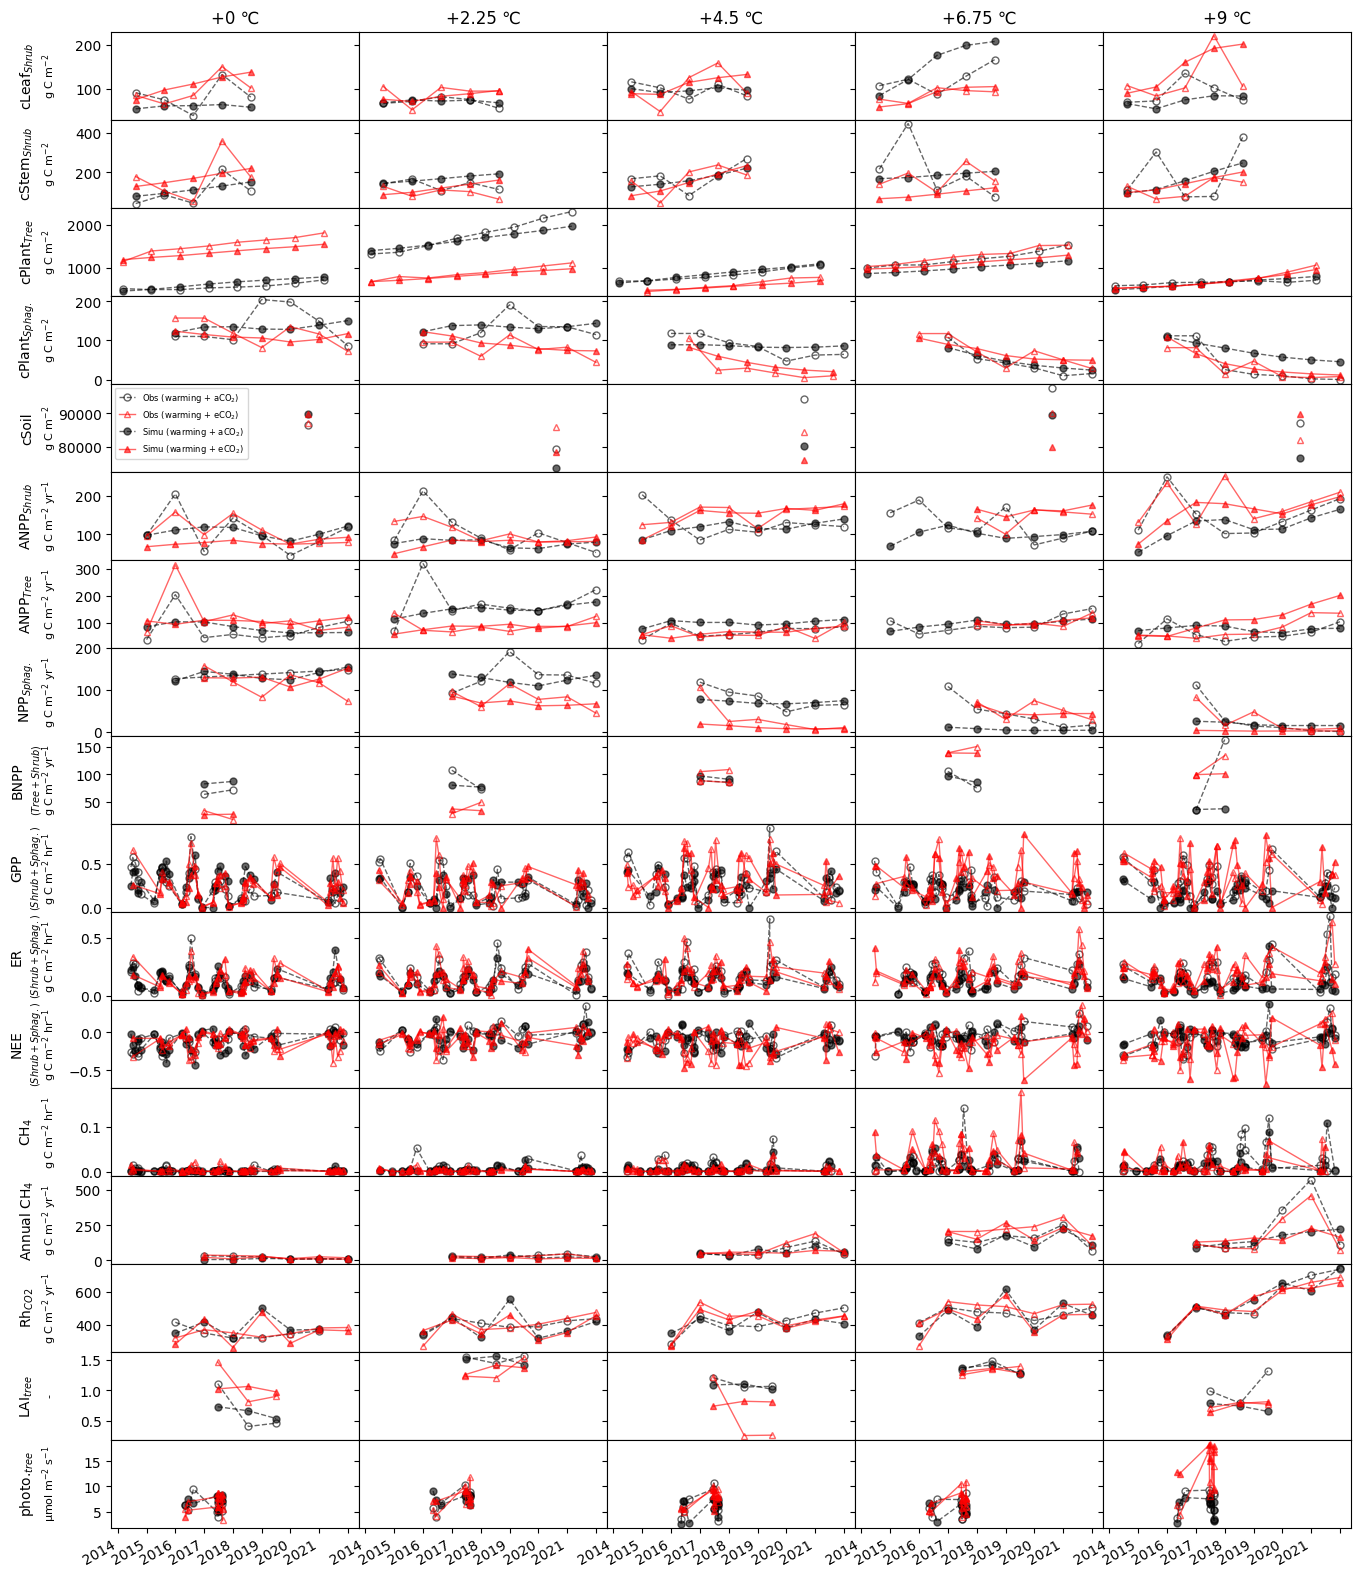

In [7]:
# temporal dynamics
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

file_path  = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/1_simu_obs/run_mcmc_"

ls_warmOnlyPlots = ["P06", "P20", "P13", "P08", "P17"]
ls_warmAndEleCO2 = ["P19", "P11", "P04", "P16", "P10"]
plot_names       = ["P04", "P06",  "P08", "P10", "P11", "P13", "P16", "P17", "P19", "P20"]

# plot the Carbon pools
fig, axes = plt.subplots(17, 5, figsize=(16, 22), sharey='row', sharex='col')
file_names = {"cLeaf_Shrub"     : "_8_compare_cLeaf_shrub.xlsx", 
              "cStem_Shrub"     : "_9_compare_cStem_shrub.xlsx",
              "cPlant_Tree"     : "_10_compare_cPlant_Tree.xlsx", 
              "cPlant_Sphagnum" : "_11_compare_cPlant_sphag.xlsx",
              "cSoil"           : "_12_compare_cSoil.xlsx",
              "ANPP_Shrub"      : "_1_compare_ANPP_shrub.xlsx", 
              "ANPP_Tree"       : "_2_compare_ANPP_tree.xlsx", 
              "NPP_Sphagnum"    : "_3_compare_NPP_sphag.xlsx", 
              "BNPP"            : "_4_compare_BNPP.xlsx",
              "GPP"             : "_6_compare_GPP_d.xlsx", 
              "ER"              :"_5_compare_ER_d.xlsx", 
              "NEE"             : "_7_compare_NEE_d.xlsx",
              "CH4"             : "_13_compare_CH4_d.xlsx", 
              "CH4_y"           : "_14_compare_CH4_y.xlsx", 
              "Rh"              : "_15_compare_rh_y.xlsx",            
              "lai_tree"        : "_20_compare_lai_tree.xlsx",
              "photo_tree_h"    : "_21_compare_photo_tree_h.xlsx"
            }

ylabels = [ "cLeaf$_{Shrub}$", 
            "cStem$_{Shrub}$", 
            "cPlant$_{Tree}$", 
            "cPlant$_{Sphag.}$", 
            "cSoil", 
            "ANPP$_{Shrub}$",
            "ANPP$_{Tree}$", 
            "NPP$_{Sphag.}$", 
            "BNPP\n$_{(Tree + Shrub)}$", 
            "GPP\n$_{(Shrub + Sphag.)}$", 
            "ER\n$_{(Shrub + Sphag.)}$", 
            "NEE\n$_{(Shrub + Sphag.)}$", 
            "CH$_4$", 
            "Annual CH$_4$", 
            "Rh$_{CO2}$", 
            "LAI$_{tree}$",
            "photo.$_{tree}$"]

units  = [  "g C m$^{-2}$", 
            "g C m$^{-2}$", 
            "g C m$^{-2}$", 
            "g C m$^{-2}$",
            "g C m$^{-2}$",
            "g C m$^{-2}$ yr$^{-1}$", 
            "g C m$^{-2}$ yr$^{-1}$", 
            "g C m$^{-2}$ yr$^{-1}$",
            "g C m$^{-2}$ yr$^{-1}$", 
            "g C m$^{-2}$ hr$^{-1}$", 
            "g C m$^{-2}$ hr$^{-1}$",
            "g C m$^{-2}$ hr$^{-1}$", 
            "g C m$^{-2}$ hr$^{-1}$", 
            "g C m$^{-2}$ yr$^{-1}$", 
            "g C m$^{-2}$ yr$^{-1}$",
            "-", 
            "μmol m$^{-2}$ s$^{-1}$", 
            "-"]

iivar = -1
for ivar, ifilename in file_names.items():
    iivar = iivar + 1
    # axes[iivar, 0].set_ylabel(ylabels[iivar])
    axes[iivar, 0].text(-0.34, 0.5, ylabels[iivar], fontsize=10, ha='center', va='center',rotation='vertical',transform=axes[iivar,0].transAxes)
    axes[iivar, 0].text(-0.25, 0.5, units[iivar], fontsize=8, ha='center', va='center',rotation='vertical',transform=axes[iivar,0].transAxes)
    for index, (iplot1, iplot2) in enumerate(zip(ls_warmOnlyPlots, ls_warmAndEleCO2)):
        ax = axes[iivar, index]
        for icol, iplot in enumerate([iplot1, iplot2]):
            # file_path = "1_temporal_results/run_mcmc_"+iplot+"/"+iplot+ifilename
            filepath = file_path+iplot+"/"+iplot+ifilename
            df_data   = pd.read_excel(filepath)
            df_data   = df_data[df_data["year"]<2022]
            df_data['timestamp'] = pd.to_datetime(df_data['year'].astype(str) + df_data['doy'].astype(str), format='%Y%j') + pd.to_timedelta(df_data['hour'], unit='h')
            if icol ==0:
                ax.plot(df_data['timestamp'], df_data['obs'], marker='o', markersize=5, markerfacecolor='none', linestyle='--', linewidth = 1,color='black', label='Obs (warming + aCO$_2$)', alpha = 0.6)
                ax.plot(df_data['timestamp'], df_data['mod'], marker='o', markersize=5, markerfacecolor='black', linestyle='--', linewidth = 1,color='black', label='Simu (warming + aCO$_2$)', alpha = 0.6)
            else:
                ax.plot(df_data['timestamp'], df_data['obs'], marker='^', markersize=5, markerfacecolor='none', linestyle='-', linewidth = 1,color="red", label='Obs (warming + eCO$_2$)', alpha = 0.6)
                ax.plot(df_data['timestamp'], df_data['mod'], marker='^', markersize=5, markerfacecolor='red', linestyle='-', linewidth = 1,color='red', label='Simu (warming + eCO$_2$)', alpha = 0.6)
        # ax.set_xticks([2015,2016, 2017, 2018, 2019, 2020, 2021, 2022])
        ax.set_xticklabels(["","2014","2015", "2016", "2017", "2018", "2019", "2020", "2021", ""])
        # tick_spacing = 2
        # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        # ax.set_xticks(range(len(df_data['timestamp']) - 1))
        ax.tick_params(axis='x', labelsize=10, rotation=45)
        ax.tick_params(axis='y', labelsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1,3]
axes[4,0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=6)
axes[0,0].set_title("+0 ℃")
axes[0,1].set_title("+2.25 ℃")
axes[0,2].set_title("+4.5 ℃")
axes[0,3].set_title("+6.75 ℃")
axes[0,4].set_title("+9 ℃")

plt.subplots_adjust(hspace=0, wspace=0)
fig.autofmt_xdate()
